In [1]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255


def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

def create_image(max_iters=100):
    image = np.zeros((1000, 1000), dtype=np.uint8)
    image = create_fractal(-2.0, 1.0, -1.0, 1.0, image, max_iters)
    return image

In [3]:
@njit
def mandel_jit(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

@njit
def create_fractal_jit(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel_jit(real, imag, iters)
            image[y, x] = color

    return image

def create_image_jit(max_iters=100):
    image = np.zeros((1000, 1000), dtype=np.uint8)
    image = create_fractal_jit(-2.0, 1.0, -1.0, 1.0, image, max_iters)
    return image

In [4]:
%load_ext snakeviz
%snakeviz create_image()

 
*** Profile stats marshalled to file '/tmp/tmp9mggf_7v'. 
Embedding SnakeViz in this document...


In [5]:
%load_ext snakeviz
%snakeviz create_image_jit()

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz
 
*** Profile stats marshalled to file '/tmp/tmpkkm9yur_'. 
Embedding SnakeViz in this document...


Jitted version contains much more stack calls due to low-level optimizations

In [6]:
%timeit -n 1 -o -r 1 -q create_image()

<TimeitResult : 5.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [7]:
%timeit -n 1 -o -q create_image_jit()

<TimeitResult : 74.4 ms ± 971 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [8]:
image = create_image_jit()

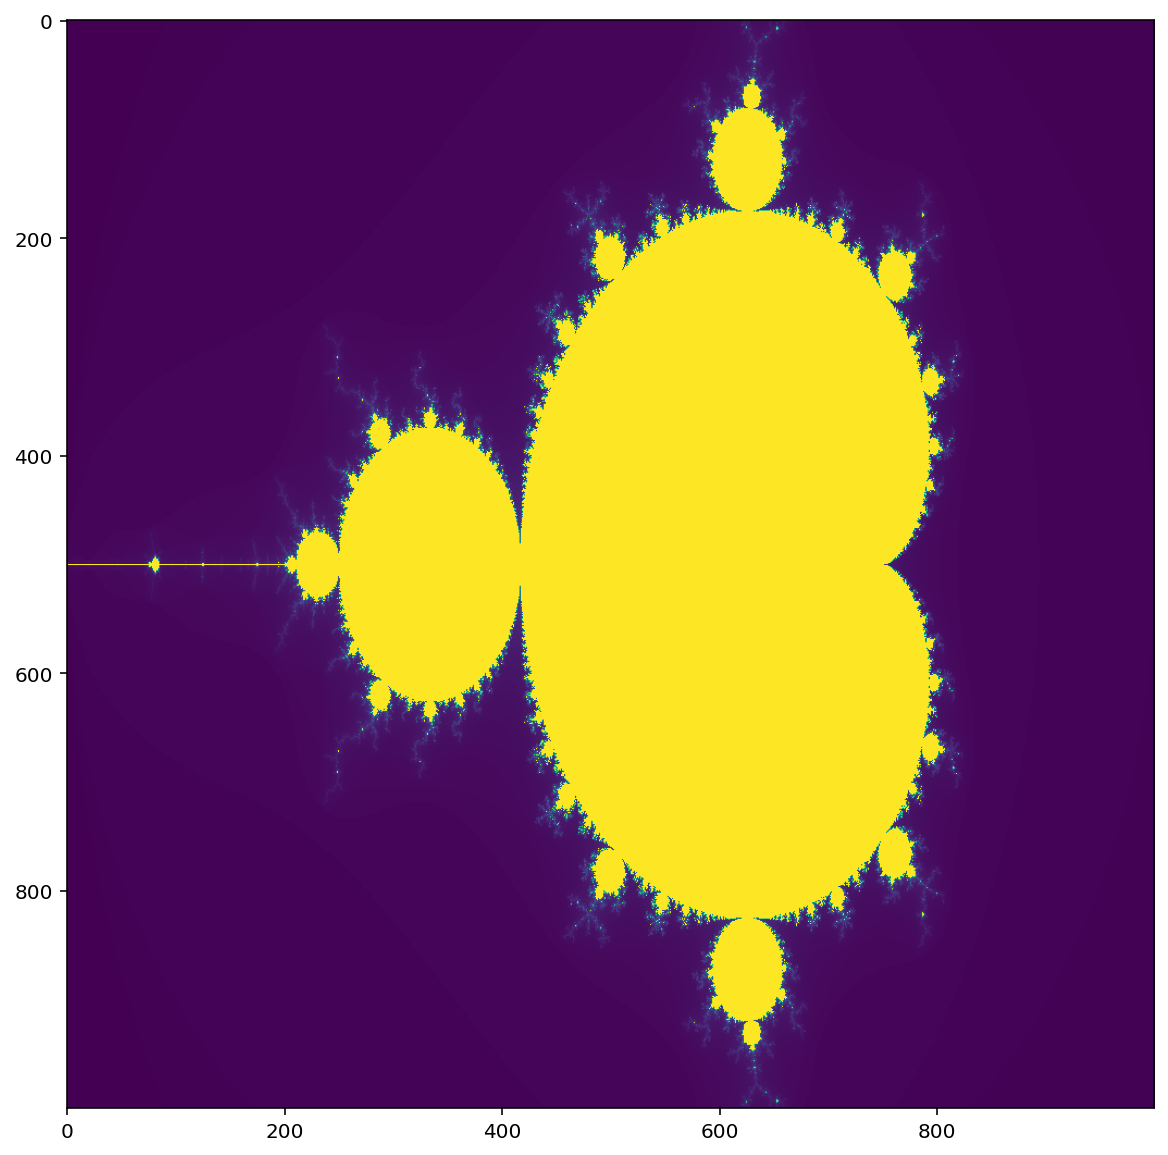

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(image);

In [12]:
times_vanilla = []
times_jit = []
iters = np.arange(10, 210, 10)
from tqdm import tqdm

for max_iters in tqdm(iters):
    t = %timeit -n 1 -r 1 -o -q create_image(max_iters)
    times_vanilla.append(t)
    t = %timeit -n 1 -o -q create_image_jit(max_iters)
    times_jit.append(t)

100%|███████████████████████████████████████████| 20/20 [01:54<00:00,  5.74s/it]


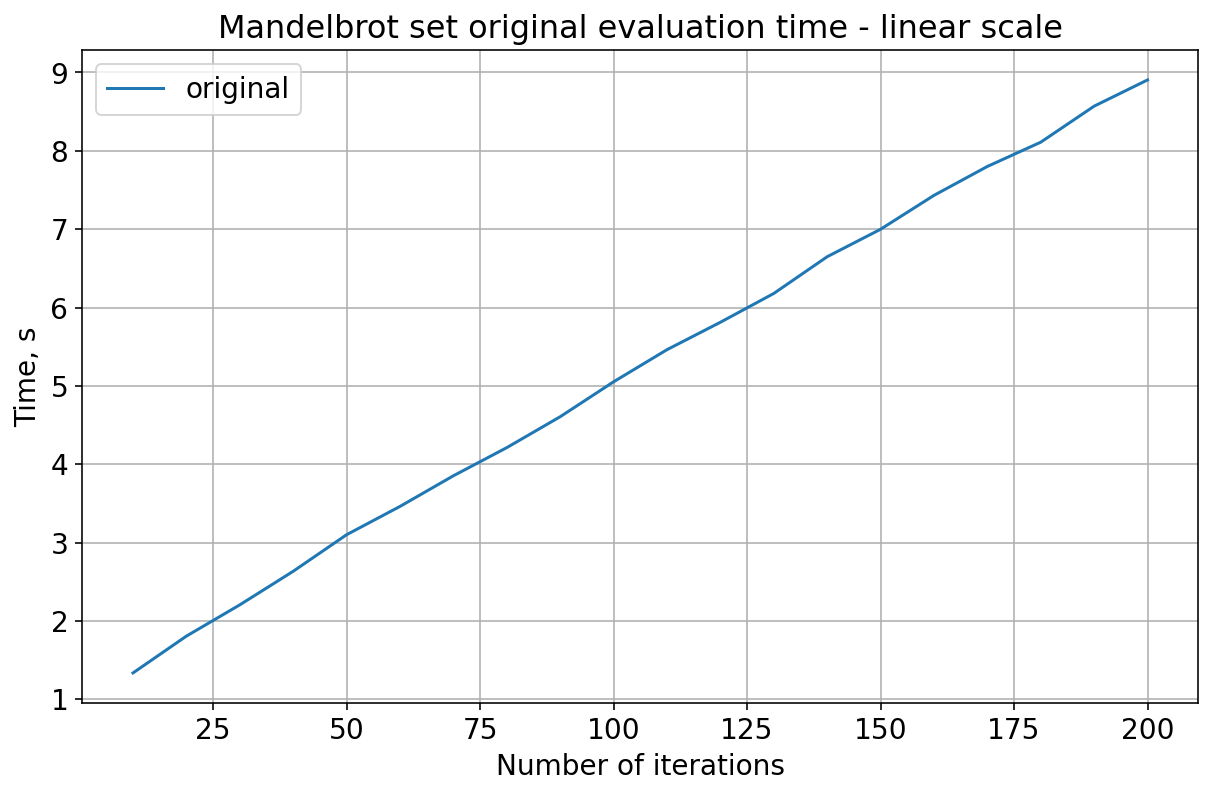

In [14]:
plt.figure(figsize=(10,6))
plt.plot(iters, [i.average for i in times_vanilla])
plt.title('Mandelbrot set original evaluation time - linear scale', fontsize=16)
plt.xlabel('Number of iterations', fontsize=14)
plt.ylabel('Time, s', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['original', 'jitted'], fontsize=14);
plt.grid()
plt.show()

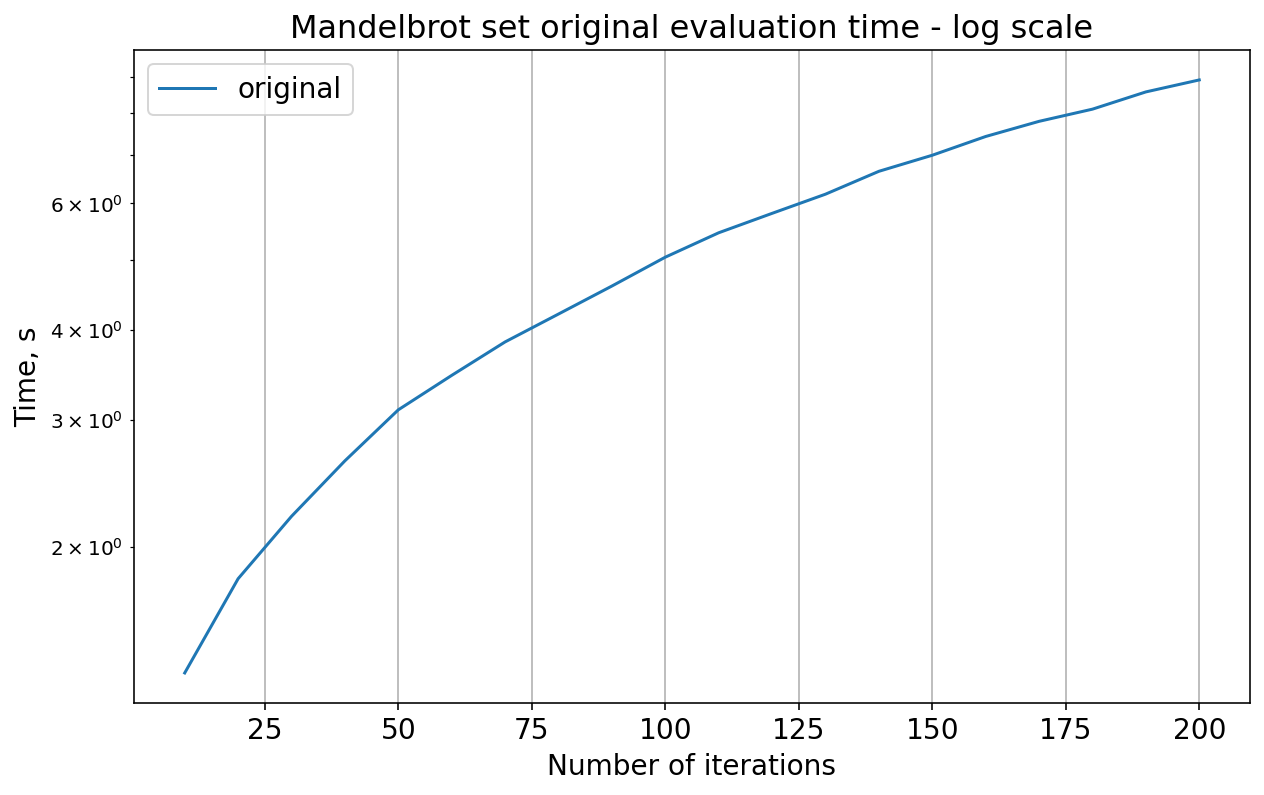

In [15]:
plt.figure(figsize=(10,6))
plt.plot(iters, [i.average for i in times_vanilla])
plt.title('Mandelbrot set original evaluation time - log scale', fontsize=16)
plt.xlabel('Number of iterations', fontsize=14)
plt.ylabel('Time, s', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(['original', 'jitted'], fontsize=14);
plt.grid()
plt.show()

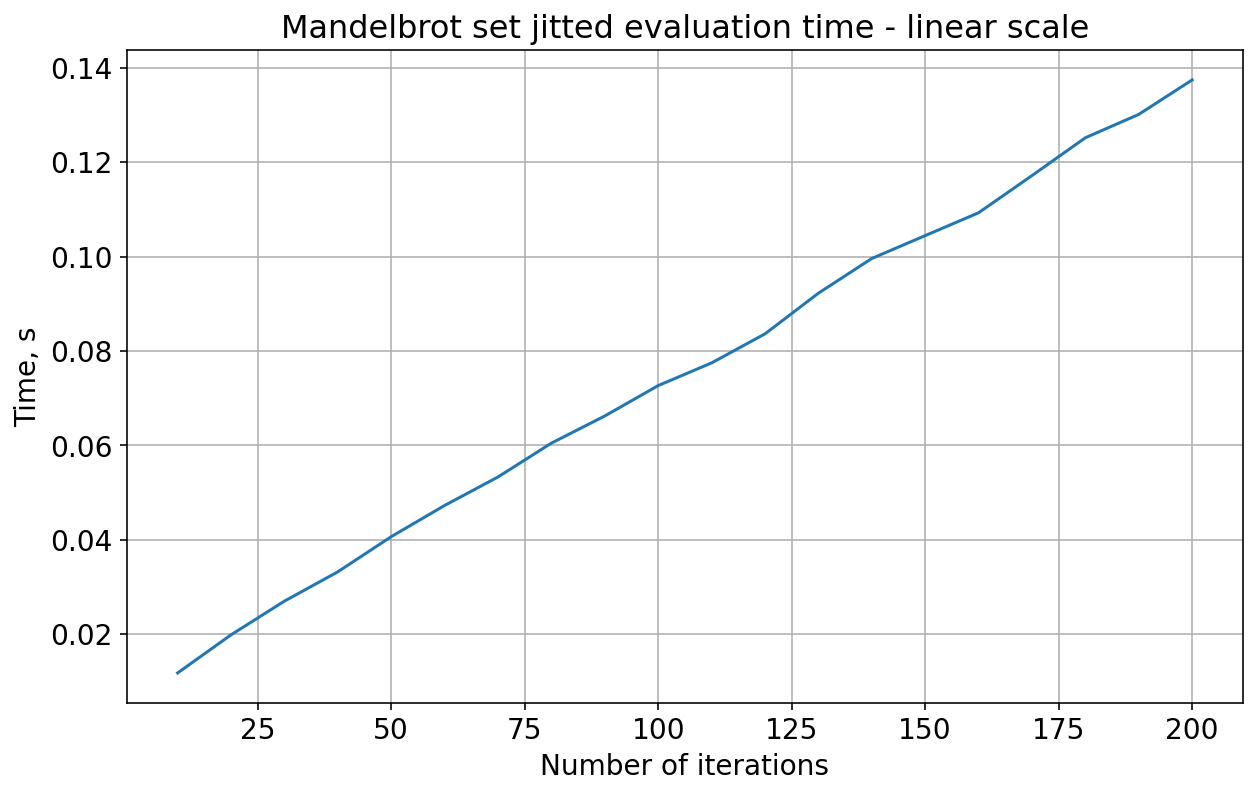

In [16]:
plt.figure(figsize=(10,6))
plt.plot(iters, [i.average for i in times_jit])
plt.title('Mandelbrot set jitted evaluation time - linear scale', fontsize=16)
plt.xlabel('Number of iterations', fontsize=14)
plt.ylabel('Time, s', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

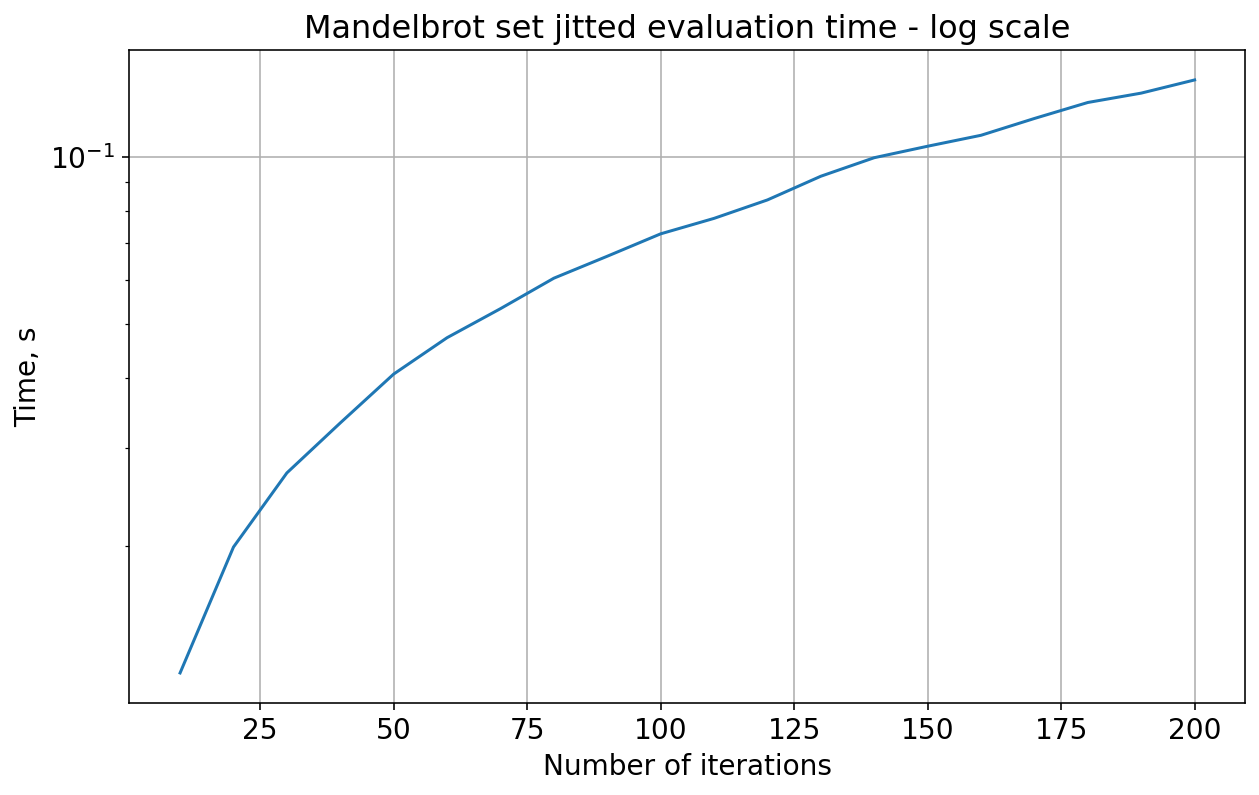

In [17]:
plt.figure(figsize=(10,6))
plt.plot(iters, [i.average for i in times_jit])
plt.title('Mandelbrot set jitted evaluation time - log scale', fontsize=16)
plt.xlabel('Number of iterations', fontsize=14)
plt.ylabel('Time, s', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

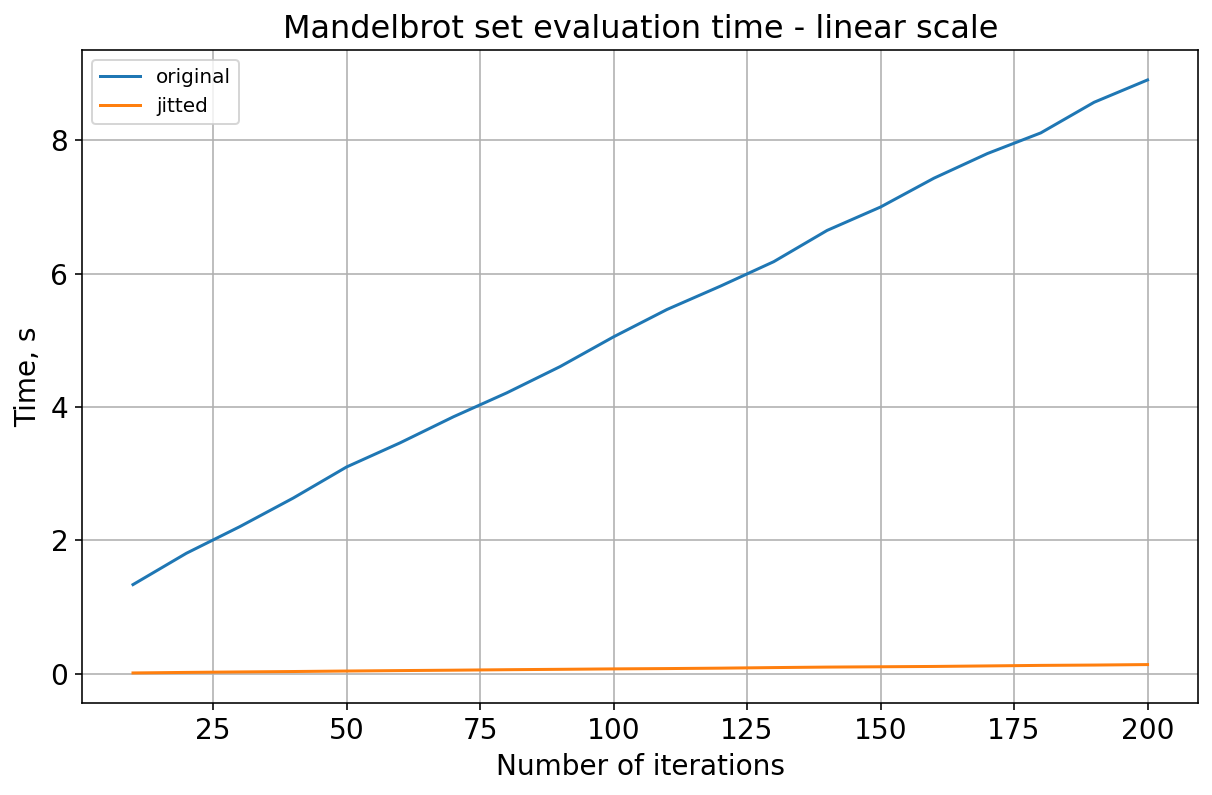

In [19]:
plt.figure(figsize=(10,6))
plt.plot(iters, [i.average for i in times_vanilla])
plt.plot(iters, [i.average for i in times_jit])
plt.title('Mandelbrot set evaluation time - linear scale', fontsize=16)
plt.xlabel('Number of iterations', fontsize=14)
plt.ylabel('Time, s', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['original', 'jitted'])
plt.grid()
plt.show()

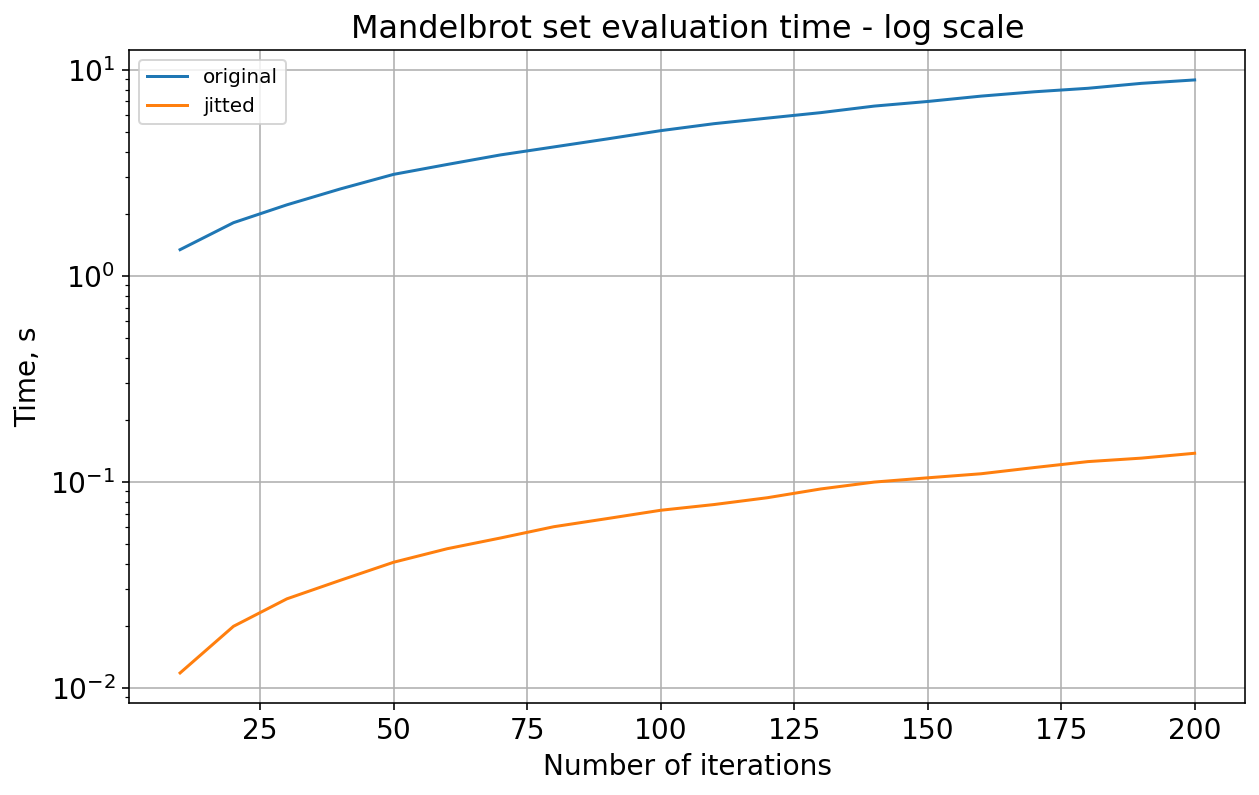

In [18]:
plt.figure(figsize=(10,6))
plt.plot(iters, [i.average for i in times_vanilla])
plt.plot(iters, [i.average for i in times_jit])
plt.title('Mandelbrot set evaluation time - log scale', fontsize=16)
plt.xlabel('Number of iterations', fontsize=14)
plt.ylabel('Time, s', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['original', 'jitted'])
plt.grid()
plt.show()